In [3]:
# Import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
from sklearn.preprocessing import OrdinalEncoder


In [4]:
#load dataset

df_train=pd.read_csv(r"C:\Users\goex1\Desktop\Mental wellness Data Science\mental_wellness_train.csv")

df_train.head(5)


,User_ID,Date,Mood_Score,Sleep_Hours,Sleep_Quality,Screen_Time_Hours,Physical_Activity_Min,Social_Interaction_Hours,Work_Productivity_Score,Weather,Diet_Quality,Stress_Level
0,U038,2023-06-07,7,10.0,Excellent,5.1,41,1.8,10,Sunny,Good,3
1,U046,2023-06-19,2,5.7,Good,5.5,36,0.9,3,Sunny,Good,8
2,U015,2023-06-03,3,7.5,Good,1.0,7,6.6,3,Cloudy,Good,8
3,U014,2023-06-24,4,5.6,Good,3.7,35,1.3,4,Rainy,Average,5
4,U016,2023-06-02,10,7.3,Excellent,5.4,29,3.6,10,Sunny,Average,1


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User_ID                   1200 non-null   object 
 1   Date                      1200 non-null   object 
 2   Mood_Score                1200 non-null   int64  
 3   Sleep_Hours               1200 non-null   float64
 4   Sleep_Quality             1200 non-null   object 
 5   Screen_Time_Hours         1200 non-null   float64
 6   Physical_Activity_Min     1200 non-null   int64  
 7   Social_Interaction_Hours  1200 non-null   float64
 8   Work_Productivity_Score   1200 non-null   int64  
 9   Weather                   1200 non-null   object 
 10  Diet_Quality              1200 non-null   object 
 11  Stress_Level              1200 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 112.6+ KB


In [6]:
#recode data with ordinalEncoder

df_umkodiert=pd.DataFrame({
    'Sleep_Quality': ['Poor', 'Fair', 'Good', 'Excellent'],
    'Weather': ['Rainy', 'Cloudy', 'Sunny','Rainy'],
    'Dietquality': ['Poor', 'Average', 'Good', 'Poor']
})

categories = [
    ['Poor', 'Fair', 'Good', 'Excellent'],  # Sleep_Quality
    ['Cloudy', 'Rainy', 'Sunny'],           # Weather
    ['Poor', 'Average', 'Good']             # Dietquality
]

encoder = OrdinalEncoder(categories=categories)
encoded = encoder.fit_transform(df_umkodiert)

df_umkodiert_encoded = pd.DataFrame(encoded, columns=df_umkodiert.columns)

df_final_kodiert=pd.concat((df_train,df_umkodiert_encoded),axis=1)

df_final_kodiert.head(5)


,User_ID,Date,Mood_Score,Sleep_Hours,Sleep_Quality,Screen_Time_Hours,Physical_Activity_Min,Social_Interaction_Hours,Work_Productivity_Score,Weather,Diet_Quality,Stress_Level,Sleep_Quality,Weather,Dietquality
0,U038,2023-06-07,7,10.0,Excellent,5.1,41,1.8,10,Sunny,Good,3,0.0,1.0,0.0
1,U046,2023-06-19,2,5.7,Good,5.5,36,0.9,3,Sunny,Good,8,1.0,0.0,1.0
2,U015,2023-06-03,3,7.5,Good,1.0,7,6.6,3,Cloudy,Good,8,2.0,2.0,2.0
3,U014,2023-06-24,4,5.6,Good,3.7,35,1.3,4,Rainy,Average,5,3.0,1.0,0.0
4,U016,2023-06-02,10,7.3,Excellent,5.4,29,3.6,10,Sunny,Average,1,NaN,NaN,NaN


# Graphical representation with Python libraries


# Distribution plots and categorical plots


### 1a.Histplot with percent


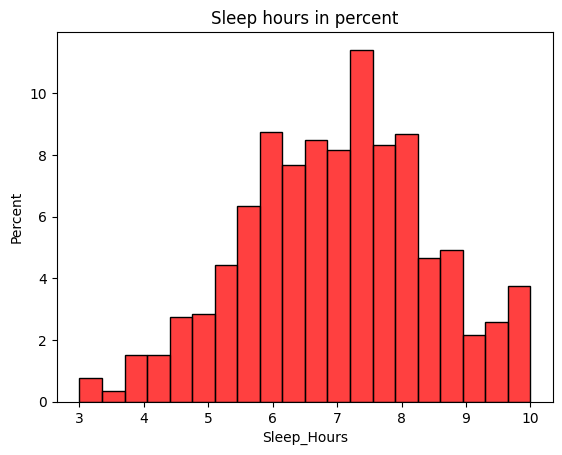

In [7]:

#1a.Histplot with percent
sns.histplot(data=df_final_kodiert,x="Sleep_Hours",stat="percent", color="red")
plt.title("Sleep hours in percent")
plt.show()

### 1b.Histplot with count


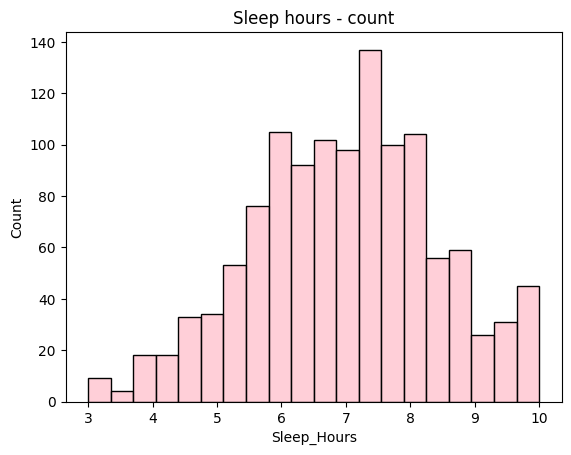

In [8]:
#1b.Histplot with count
sns.histplot(data=df_final_kodiert,x="Sleep_Hours", color="pink")
plt.title("Sleep hours - count")
plt.show()

### 2. Kdeplot


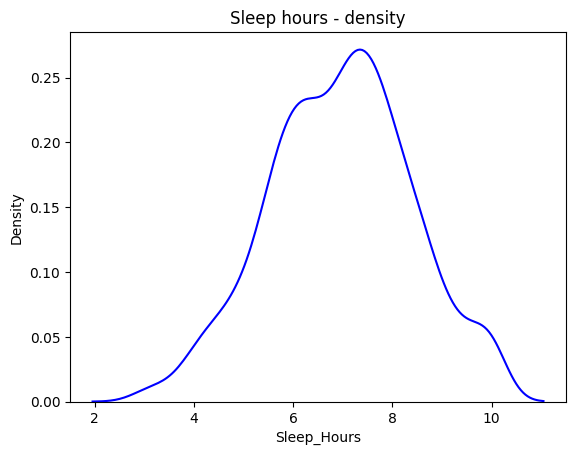

In [9]:
sns.kdeplot(data=df_final_kodiert,x="Sleep_Hours", color="blue")
plt.title("Sleep hours - density")
plt.show()

### 3a. Boxplot


c:\Users\goex1\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


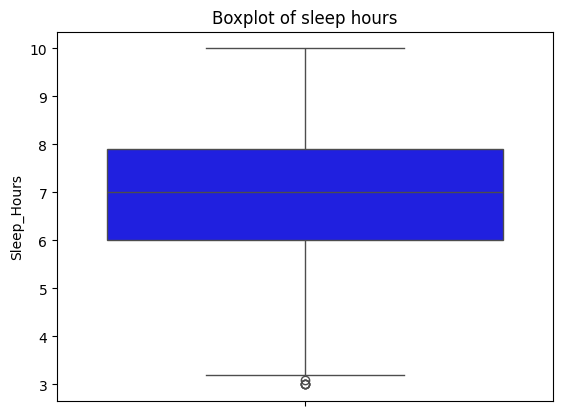

In [12]:
sns.boxplot(data=df_final_kodiert,y="Sleep_Hours", color="blue")
plt.title("Boxplot of sleep hours")
plt.show()

### 3b. Boxplot with hue


c:\Users\goex1\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\goex1\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\goex1\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\goex1\AppData\Local\Programs\Python\Python313

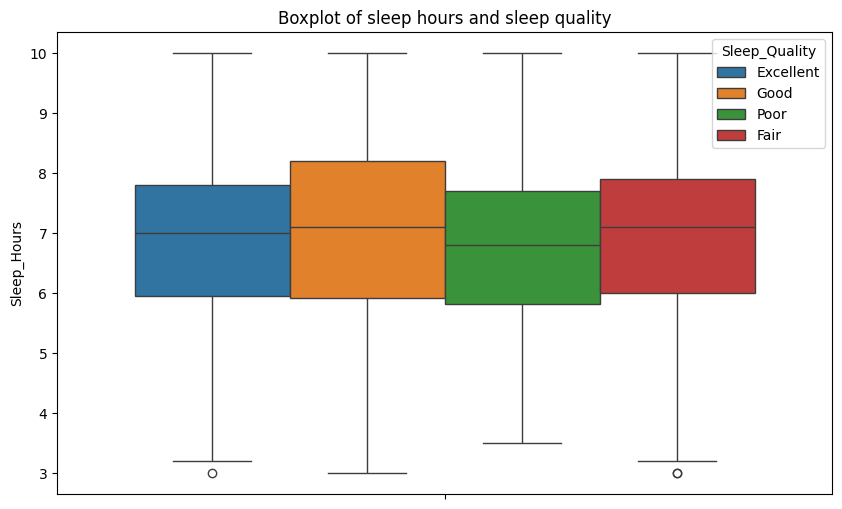

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_train,y="Sleep_Hours", hue="Sleep_Quality")
plt.title("Boxplot of sleep hours and sleep quality")
plt.show()


### 4a. Violinplot


c:\Users\goex1\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


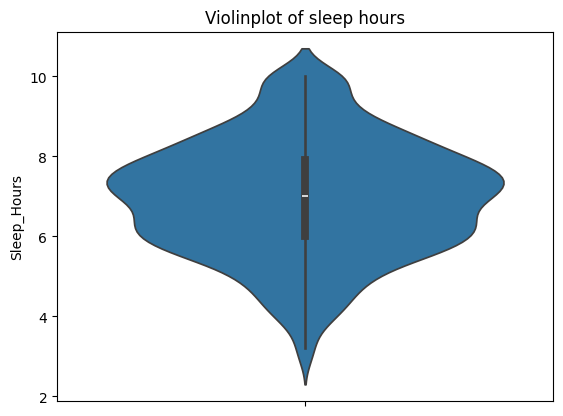

In [ ]:
sns.violinplot(data=df_train,y="Sleep_Hours")
plt.title("Violinplot of sleep hours")
plt.show()

### 4b. Violinplot with hue


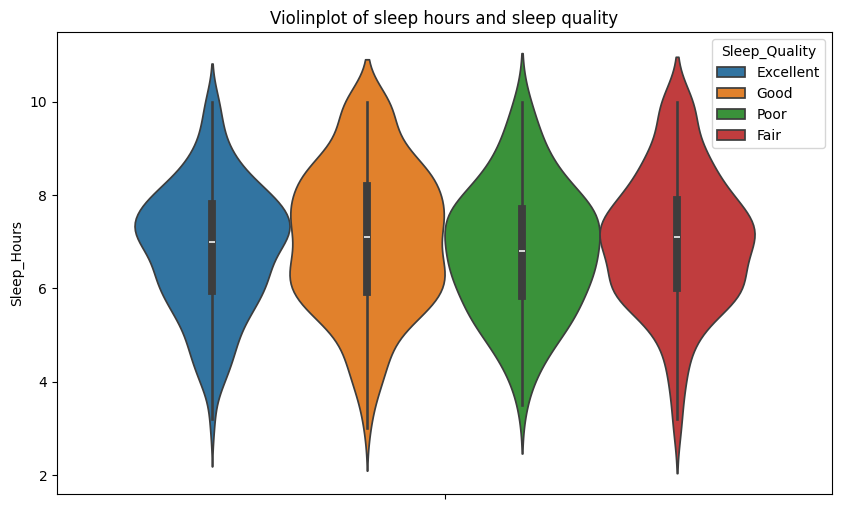

In [17]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df_train,y="Sleep_Hours", hue="Sleep_Quality")
plt.title("Violinplot of sleep hours and sleep quality")
plt.show()

### 5a. Barplot


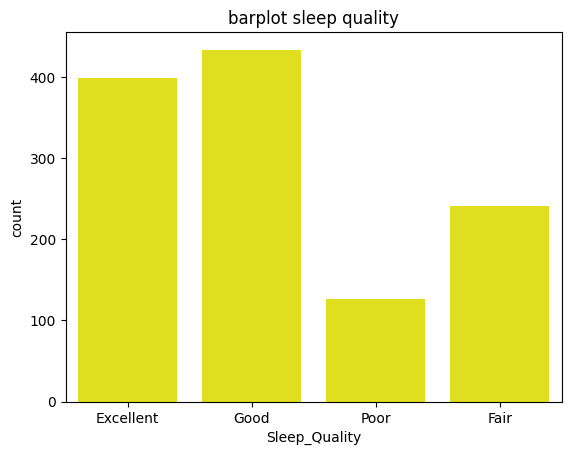

In [ ]:
sns.countplot(data=df_train,x="Sleep_Quality",color="yellow")
plt.title("barplot sleep quality")
plt.show()

### 5b. Barplot and hue


In [ ]:
plt.figure(figsize=(10,6))
plt.title("barplot mean sleep hours and sleep quality")
sns.barplot(data=df_train,y="Sleep_Hours", hue="Sleep_Quality")
plt.ylabel("mean sleep hours")
plt.show()

# Graphics for bivariate relationships

### 1. Scatterplot

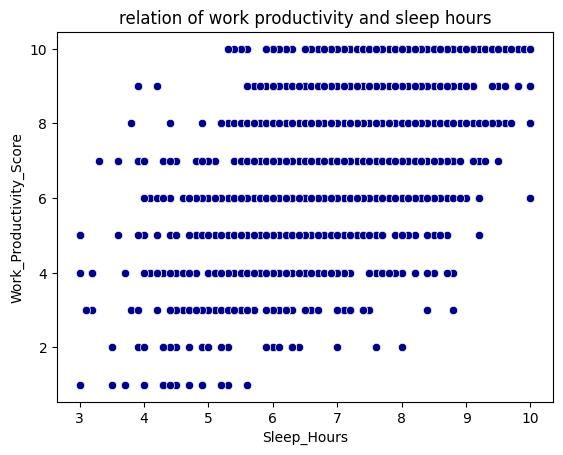

In [18]:
sns.scatterplot(data=df_train,x="Sleep_Hours",y="Work_Productivity_Score",color="darkblue")
plt.title("relation of work productivity and sleep hours")
plt.show()

### 2. Regplot

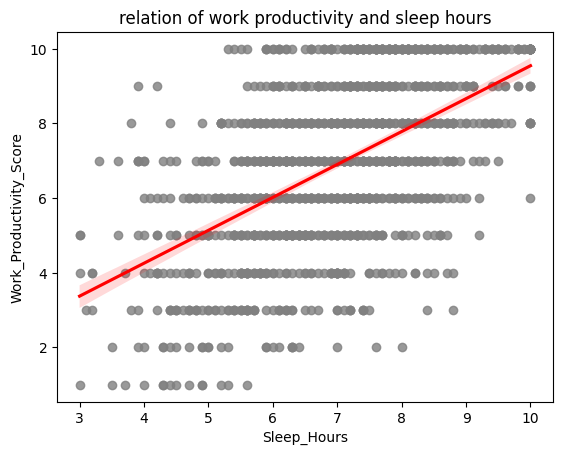

In [19]:
sns.regplot(data=df_train,
            x="Sleep_Hours",
            y="Work_Productivity_Score",
            scatter_kws={"color": "grey"},
            line_kws={"color": "red"})
plt.title("relation of work productivity and sleep hours")
plt.show()

### 3. Lineplot

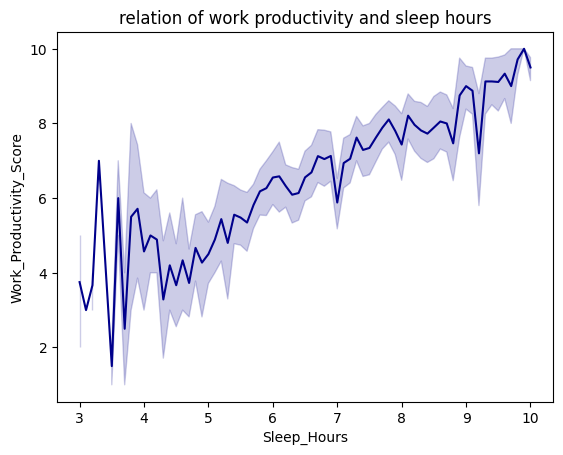

In [20]:
sns.lineplot(data=df_train,x="Sleep_Hours",y="Work_Productivity_Score",color="darkblue")
plt.title("relation of work productivity and sleep hours")
plt.show()

# Multidimensional visualization

### 1. Pairplot

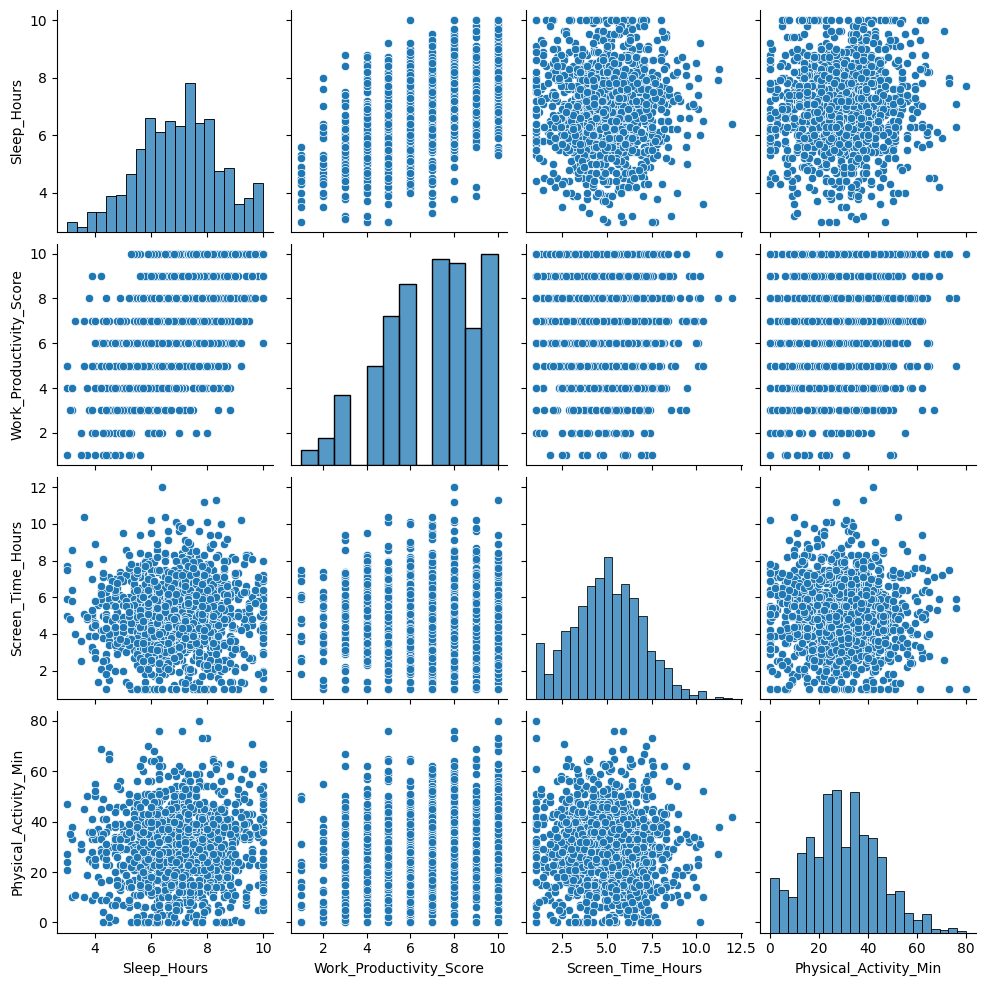

In [21]:
relevant_variables=["Sleep_Hours", "Work_Productivity_Score","Screen_Time_Hours","Physical_Activity_Min"]
sns.pairplot(data=df_train, vars=relevant_variables)
plt.show()